In [2]:
import math
import bs4
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import mplfinance as mpf
import yfinance as yf
from scipy import stats
import stockquotes

%matplotlib inline
yf.pdr_override()

In [3]:
raw_startyear=input("Enter Starting Year: ")
raw_startmonth=input("Enter Starting Month: ")
raw_startday=input("Enter Starting Day: ")

Enter Starting Year: 2021
Enter Starting Month: 3
Enter Starting Day: 1


In [4]:
startyear=int(raw_startyear)
startmonth=int(raw_startmonth)
startday=int(raw_startday)
start=dt.datetime(startyear,startmonth,startday)
now=dt.datetime.now()

In [12]:
stock1=input("Enter First Stock: ")
print("Stock 1:" + stock1)
stock1IVin=input("Enter IV: ")
stock1IV=float(stock1IVin)
stockd1=pdr.get_data_yahoo(stock1,start,now,interval='1wk')
stockd1 = stockd1.dropna()

stock2=input("Enter Second Stock: ")
print("Stock 2:" + stock2)
stock2IVin=input("Enter IV: ")
stock2IV=float(stock2IVin)
stockd2=pdr.get_data_yahoo(stock2,start,now,interval='1wk')
stockd2 = stockd2.dropna()

Enter First Stock: xle
Stock 1:xle
Enter IV: .274
[*********************100%***********************]  1 of 1 completed
Enter Second Stock: cvx
Stock 2:cvx
Enter IV: .218
[*********************100%***********************]  1 of 1 completed


In [13]:
stock1pct=stockd1['Adj Close'].pct_change().values
stock2pct=stockd2['Adj Close'].pct_change().values
print(stock1pct)
print(stock2pct)

[        nan  0.01170915 -0.07541534  0.01817088  0.00820535 -0.04213883
  0.00435781 -0.01776856  0.03891452  0.08584736 -0.00261042 -0.02486455
  0.0009586   0.06780306 -0.00663666 -0.05399067  0.05630846 -0.00164577
 -0.03364423 -0.07890247 -0.0032868   0.01793077  0.00242959 -0.00181783
 -0.0714285   0.07452602 -0.01399317 -0.0170711   0.03201506  0.03203569
  0.0706111   0.05070579  0.01343472  0.0013954   0.        ]
[            nan  2.34863161e-02 -7.33238385e-02  3.96596500e-02
 -1.60960557e-02 -2.67613514e-02  3.88759615e-04 -1.36946501e-02
  1.49680010e-02  6.74298411e-02 -4.99906023e-03 -4.88718590e-02
  9.03258795e-03  4.48983390e-02 -4.97915927e-03 -4.52229087e-02
  4.14442289e-02 -1.14631950e-02 -1.88554920e-02 -5.23685541e-02
  2.43352001e-03  2.98402037e-02  1.37511268e-03  9.80657833e-05
 -7.51274806e-02  6.01260366e-02 -1.16585719e-02 -1.45655780e-02
  7.18228837e-03  3.96857819e-02  3.70775687e-02  3.56561023e-02
  1.44377373e-02  1.94325084e-02  0.00000000e+00]


Beta =  0.7887875432850193
r =  0.9362807722300917
Std Error 0.052311643901523486


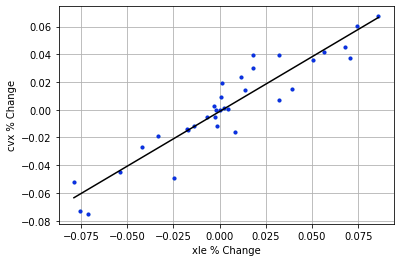

In [14]:
plt.plot(stock1pct,stock2pct,'.')
plt.grid(True)
plt.xlabel(stock1 + " % Change")
plt.ylabel(stock2 + " % Change")
stock1pct = np.delete(stock1pct,0)
stock2pct = np.delete(stock2pct,0)
slope, intercept, r, p, std_error= stats.linregress(stock1pct,stock2pct)
print('Beta = ', slope)
print('r = ', r)
print('Std Error', std_error)
x = np.linspace(np.amin(stock1pct),np.amax(stock1pct))
y = slope * x + intercept
plt.plot(stock1pct, stock2pct, 'b.', alpha = .5)
plt.plot(x,y,'k')

In [15]:
EXPDaysRaw =input("Desired Days to Exp: ")
EXPDays =int(EXPDaysRaw)

stock1Price = float( stockquotes.Stock(stock1).current_price)
print(stock1Price)
stock1IMP_Per = ((math.sqrt(EXPDays/365)*stock1IV*stock1Price)/stock1Price)
stock2Price = float(stockquotes.Stock(stock2).current_price)
stock2IMP_Per = (stock1IMP_Per*slope)
print("Stock 1 Implied % Change ", (stock1IMP_Per))
print("Stock 2 Implied % Change ", (stock2IMP_Per))
print("//////////////////////////////////////////////")
print("Stock 1 Implied $ Change ", stock1IMP_Per*stock1Price)
print("Stock 2 Implied $ Change ", stock2IMP_Per*stock2Price)

Desired Days to Exp: 15
57.41
Stock 1 Implied % Change  0.05554561250443775
Stock 2 Implied % Change  0.0438136872276371
//////////////////////////////////////////////
Stock 1 Implied $ Change  3.188873613879771
Stock 2 Implied $ Change  4.89574141081617


In [18]:
rawcustomImpChng = input("Enter Stock Desired Imp Change: ")
customImpChng = float(rawcustomImpChng)
custom1Per = customImpChng/stock1Price
custom2Per = slope*custom1Per
custom2ImpChng = custom2Per*stock2Price

Enter Stock Desired Imp Change: 3.5


In [19]:
print("//////////////////////////////////////////////")
print("Custom Stock 1 Implied % Change ", (custom1Per))
print("Custom Stock 2 Implied % Change ", (custom2Per))
print("//////////////////////////////////////////////")
print("Custom Stock 1 Implied $ Change ", custom1Per*stock1Price)
print("Custom Stock 2 Implied $ Change ", custom2Per*stock2Price)

//////////////////////////////////////////////
Custom Stock 1 Implied % Change  0.060964988677930675
Custom Stock 2 Implied % Change  0.04808842364566396
//////////////////////////////////////////////
Custom Stock 1 Implied $ Change  3.5
Custom Stock 2 Implied $ Change  5.373400458166491
